Hi there! I'm Ajay. Here's my python v3.12.6 code using Jupyter Notebook IDE to build a machine-learning model for image classification.
Let's begin the code by importing fundamental libraries from python.

In [8]:
import numpy as np  # Importing NumPy for numerical operations
import random  # Importing random module for generating random numbers
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting graphs
from tensorflow.keras.models import Sequential  # Importing Sequential model from Keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # Importing layers for building a CNN
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Preprocessing for the training, validation, and test sets

# Preprocessing Dataset

In [9]:
# Create data generators for loading and preprocessing the data
train_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load Dataset

In [10]:
# Load images from directories. I also defined the path file.
train_generator = train_datagen.flow_from_directory(
        'dataset/train', target_size=(150, 150), batch_size=32, class_mode='categorical')

valid_generator = valid_datagen.flow_from_directory(
        'dataset/valid', target_size=(150, 150), batch_size=32, class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        'dataset/test', target_size=(150, 150), batch_size=32, class_mode='categorical')

model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),  # To prevent overfitting
        Dense(6, activation='softmax')  # 6 categories
    ])


Found 14034 images belonging to 6 classes.
Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


c:\Users\ajaya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Print the number of samples in each generator
print(f'Train samples: {train_generator.samples}')
print(f'Validation samples: {valid_generator.samples}')

# Calculate steps per epoch
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = valid_generator.samples // valid_generator.batch_size

# while trouble shooting, I use this below code's output data to check the vadility of file paths for the Train and validaton sets

print(train_generator)
print(valid_generator)
for data_batch, labels_batch in train_generator:
    print(f"Data batch shape: {data_batch.shape}")
    print(f"Labels batch shape: {labels_batch.shape}")
    break
print(train_generator.filepaths)
print(valid_generator.filepaths)


Train samples: 14034
Validation samples: 14034
Data batch shape: (32, 150, 150, 3)
Labels batch shape: (32, 6)
['dataset/train\\buildings\\0.jpg', 'dataset/train\\buildings\\10006.jpg', 'dataset/train\\buildings\\1001.jpg', 'dataset/train\\buildings\\10014.jpg', 'dataset/train\\buildings\\10018.jpg', 'dataset/train\\buildings\\10029.jpg', 'dataset/train\\buildings\\10032.jpg', 'dataset/train\\buildings\\10056.jpg', 'dataset/train\\buildings\\1009.jpg', 'dataset/train\\buildings\\10113.jpg', 'dataset/train\\buildings\\1012.jpg', 'dataset/train\\buildings\\10126.jpg', 'dataset/train\\buildings\\10144.jpg', 'dataset/train\\buildings\\10151.jpg', 'dataset/train\\buildings\\10161.jpg', 'dataset/train\\buildings\\10165.jpg', 'dataset/train\\buildings\\10176.jpg', 'dataset/train\\buildings\\10184.jpg', 'dataset/train\\buildings\\10185.jpg', 'dataset/train\\buildings\\10191.jpg', 'dataset/train\\buildings\\10196.jpg', 'dataset/train\\buildings\\10198.jpg', 'dataset/train\\buildings\\10205.jpg'

# CNN Model

In [12]:
model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),  # To prevent overfitting
        Dense(6, activation='softmax')  # 6 categories
    ])

I'm using Adam optimizer here.

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [14]:
model.summary()  # To see the structure of my model

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,126 (18.42 MB)

 Trainable params: 4,829,126 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

# Training the Model

In [15]:
history = model.fit(
    train_generator, 
    steps_per_epoch=steps_per_epoch, 
    epochs=10, 
    validation_data=valid_generator, 
    validation_steps=validation_steps
)

# Optional: Print the history keys to check training information
print(history.history.keys())

Epoch 1/10


c:\Users\ajaya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


438/438 ━━━━━━━━━━━━━━━━━━━━ 255s 578ms/step - accuracy: 0.5050 - loss: 1.2572 - val_accuracy: 0.7443 - val_loss: 0.7068
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step - accuracy: 0.7188 - loss: 0.7384 - val_accuracy: 0.7222 - val_loss: 0.6840
Epoch 3/10


c:\Users\ajaya\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


438/438 ━━━━━━━━━━━━━━━━━━━━ 151s 346ms/step - accuracy: 0.7235 - loss: 0.7440 - val_accuracy: 0.7972 - val_loss: 0.5458
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 127us/step - accuracy: 0.7500 - loss: 0.6480 - val_accuracy: 0.7222 - val_loss: 0.7101
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 153s 349ms/step - accuracy: 0.7838 - loss: 0.6068 - val_accuracy: 0.8385 - val_loss: 0.4492
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 145us/step - accuracy: 0.8750 - loss: 0.3860 - val_accuracy: 0.8889 - val_loss: 0.3965
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 151s 344ms/step - accuracy: 0.8063 - loss: 0.5551 - val_accuracy: 0.8811 - val_loss: 0.3387
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 190us/step - accuracy: 1.0000 - loss: 0.1589 - val_accuracy: 0.8333 - val_loss: 0.4280
Epoch 9/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 161s 368ms/step - accuracy: 0.8508 - loss: 0.4180 - val_accuracy: 0.8801 - val_loss: 0.3213
Epoch 10/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 143us/step - accuracy: 0.7812 - loss: 0.6973 - va

# Evaluating the Model

In [16]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

94/94 ━━━━━━━━━━━━━━━━━━━━ 21s 223ms/step - accuracy: 0.8115 - loss: 0.5368
Test accuracy: 0.8203333616256714


# Generating Classification Report

In [17]:
from sklearn.metrics import classification_report
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = y_pred.argmax(axis=-1)

print(classification_report(y_true, y_pred_classes, target_names=['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']))
print(f'Test accuracy: {test_acc}')
# So I can generate a detailed performance evaluation, use precision, recall, and F1-score metrics.

94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step
              precision    recall  f1-score   support

   buildings       0.15      0.15      0.15       437
      forest       0.16      0.16      0.16       474
     glacier       0.20      0.14      0.17       553
    mountain       0.21      0.22      0.22       525
         sea       0.17      0.21      0.19       510
      street       0.17      0.17      0.17       501

    accuracy                           0.18      3000
   macro avg       0.18      0.18      0.17      3000
weighted avg       0.18      0.18      0.18      3000

Test accuracy: 0.8203333616256714


# Visualizing Plot Accuracy and Loss

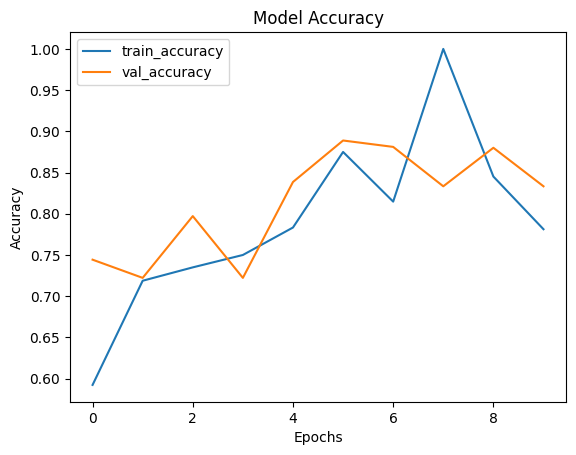

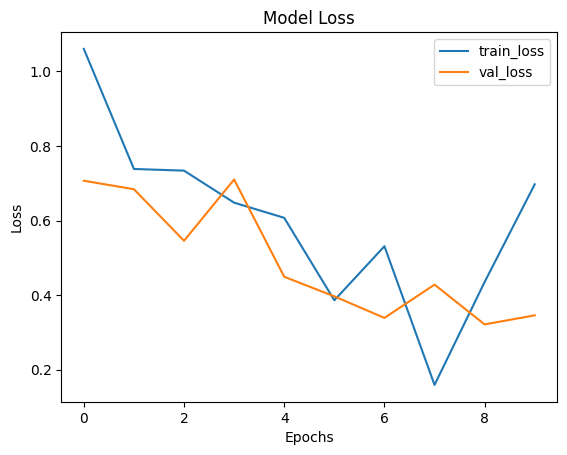

In [18]:


# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Saving the Model

In [19]:
# I'm saving the model so I can reuse it without retraining every time
model.save('image_classifier_model.h5')

# Real Time Output

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


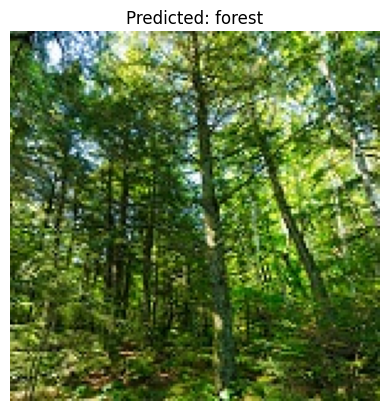

In [20]:
import os
import random
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Function to predict a random image from the 'predict' folder
def predict_random_image(model, predict_folder='dataset/predict'):
    # Get a list of all images in the predict folder
    images = [img for img in os.listdir(predict_folder) if img.endswith(('png', 'jpg', 'jpeg'))]

    # Select a random image
    random_image = random.choice(images)
    img_path = os.path.join(predict_folder, random_image)

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(150, 150))  # Resize image to match model input
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize pixel values

    # Make predictions
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=-1)[0]

    # Class mapping
    class_mapping = {0: 'buildings', 1: 'forest', 2: 'glacier', 3: 'mountain', 4: 'sea', 5: 'street'}

    # Display the image and prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted: {class_mapping[predicted_class]}')
    plt.show()

# Example Usage
if __name__ == "__main__":
    # Load your trained model (if not already loaded)
    from tensorflow.keras.models import load_model

    model = load_model('image_classifier_model.h5')  # Load your saved model
    predict_random_image(model)  # Call the function to predict a random image
